In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
class Net(nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(2, 32)
        self.fc2 = nn.Linear(32, 32)
        #self.fc3 = nn.Linear(256, 256)
        #self.fc4 = nn.Linear(128, 128)
        #self.fc5 = nn.Linear(128, 128)
        #self.fc6 = nn.Linear(128, 128)
        self.fc7 = nn.Linear(32, 2)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        #x = F.relu(self.fc3(x))
        #x = F.relu(self.fc4(x))
        #x = F.relu(self.fc5(x))
        #x = F.relu(self.fc6(x))
        x = self.fc7(x)
        return F.log_softmax(x)
        #return F.softmax(x)

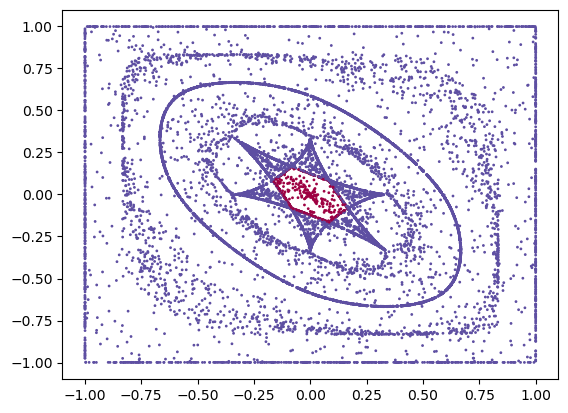

In [9]:
def plot_data(X, y, filename):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, s = 1)
    plt.savefig(filename)
    plt.close()
        
def plot_decision_boundary(clf, X, y, filename):
    # Set min and max values and give it some padding
    #x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    #y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    x_min, x_max = -1, 1
    y_min, y_max = -1, 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    #Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    X_out = net(torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype = torch.float))
    Z = X_out.data.max(1)[1]
    # Z.shape
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, s = 1)
    plt.savefig(filename)
    plt.close()

data = pd.read_csv("FeedForward_Data_hexa.csv") # UPDATE THE FILE NAME AND PATH TO MATCH YOUR REQUIREMENT
X = data.values[:, 0:2]  # Take only the first two features.     
X = torch.tensor(X, dtype = torch.float)   
y = data.values[:, 2]
y = torch.tensor(y, dtype = torch.long)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, s = 1)

In [4]:
#%% train
net = Net()

# create a stochastic gradient descent optimizer
learning_rate = 0.01
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)
#optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)

# create a loss function
criterion = nn.CrossEntropyLoss()
#criterion = nn.NLLLoss()

#nepochs = 600
nepochs = 10000
#10000
data, target = X, y

for epoch in range(nepochs):
#    adjust learning rate if desired
#    if epoch % 3000 == 0 and epoch <= 24000:
#        for g in optimizer.param_groups:
#            g['lr'] = g['lr']/2
    optimizer.zero_grad()
    # forward propagate
    net_out = net(data)
    # compute loss
    loss = criterion(net_out, target)
    
    # backpropagate
    loss.backward()
    # update parameters
    optimizer.step()
    # print out report
    
    if epoch % 10 == 0:
        print('Epoch ', epoch, 'Loss ', loss.item())
        #if(loss.item()<0.0001):
          #break
        net_out = net(data)
        pred = net_out.data.max(1)[1]  # get the index of the max log-probability
        correctidx = pred.eq(target.data) 
        ncorrect = correctidx.sum()
        accuracy = ncorrect.item()/len(data)
        print('Training accuracy is ', accuracy)
        if (accuracy==1):
            break

C:\Users\aradh\AppData\Local\Temp\ipykernel_57672\3878313576.py:21: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Epoch  0 Loss  0.8406838774681091
Training accuracy is  0.05942453609796409
Epoch  10 Loss  0.2082149237394333
Training accuracy is  0.940575463902036
Epoch  20 Loss  0.24280154705047607
Training accuracy is  0.940575463902036
Epoch  30 Loss  0.18550577759742737
Training accuracy is  0.940575463902036
Epoch  40 Loss  0.16519393026828766
Training accuracy is  0.940575463902036
Epoch  50 Loss  0.14880849421024323
Training accuracy is  0.940575463902036
Epoch  60 Loss  0.1339007467031479
Training accuracy is  0.940575463902036
Epoch  70 Loss  0.12227896600961685
Training accuracy is  0.940575463902036
Epoch  80 Loss  0.11154074966907501
Training accuracy is  0.940575463902036
Epoch  90 Loss  0.10206683725118637
Training accuracy is  0.940575463902036
Epoch  100 Loss  0.09338100254535675
Training accuracy is  0.940575463902036
Epoch  110 Loss  0.08600346744060516
Training accuracy is  0.940575463902036
Epoch  120 Loss  0.08014880120754242
Training accuracy is  0.9510930809105251
Epoch  130

Epoch  1060 Loss  0.0399724617600441
Training accuracy is  0.9808429118773946
Epoch  1070 Loss  0.039737943559885025
Training accuracy is  0.9806175343700698
Epoch  1080 Loss  0.04284597188234329
Training accuracy is  0.9817444219066938
Epoch  1090 Loss  0.04051293805241585
Training accuracy is  0.9789647659830215
Epoch  1100 Loss  0.03964615613222122
Training accuracy is  0.98046728269852
Epoch  1110 Loss  0.03939494863152504
Training accuracy is  0.9821200510855683
Epoch  1120 Loss  0.039313822984695435
Training accuracy is  0.9802419051911953
Epoch  1130 Loss  0.039320848882198334
Training accuracy is  0.9809180377131695
Epoch  1140 Loss  0.039089903235435486
Training accuracy is  0.9811434152204943
Epoch  1150 Loss  0.04055911675095558
Training accuracy is  0.9786642626399219
Epoch  1160 Loss  0.039641592651605606
Training accuracy is  0.9828713094433176
Epoch  1170 Loss  0.038848184049129486
Training accuracy is  0.9817444219066938
Epoch  1180 Loss  0.040375567972660065
Training a

Epoch  2110 Loss  0.034339334815740585
Training accuracy is  0.9809180377131695
Epoch  2120 Loss  0.032751500606536865
Training accuracy is  0.9857260912027647
Epoch  2130 Loss  0.03567780554294586
Training accuracy is  0.9858763428743145
Epoch  2140 Loss  0.034133415669202805
Training accuracy is  0.9809180377131695
Epoch  2150 Loss  0.03261920437216759
Training accuracy is  0.9858012170385395
Epoch  2160 Loss  0.034803010523319244
Training accuracy is  0.986402223724739
Epoch  2170 Loss  0.03396700322628021
Training accuracy is  0.9812185410562693
Epoch  2180 Loss  0.032529011368751526
Training accuracy is  0.9855007136954399
Epoch  2190 Loss  0.03463313356041908
Training accuracy is  0.9856509653669897
Epoch  2200 Loss  0.03244144469499588
Training accuracy is  0.9852002103523402
Epoch  2210 Loss  0.03458166494965553
Training accuracy is  0.9798662760123207
Epoch  2220 Loss  0.032280512154102325
Training accuracy is  0.9849748328450154
Epoch  2230 Loss  0.03569548949599266
Training 

Epoch  3160 Loss  0.029859069734811783
Training accuracy is  0.9858012170385395
Epoch  3170 Loss  0.0307171493768692
Training accuracy is  0.9839230711441664
Epoch  3180 Loss  0.03026283159852028
Training accuracy is  0.9858763428743145
Epoch  3190 Loss  0.029856575652956963
Training accuracy is  0.9856509653669897
Epoch  3200 Loss  0.032685957849025726
Training accuracy is  0.9833220644579671
Epoch  3210 Loss  0.02998718060553074
Training accuracy is  0.9870032304109383
Epoch  3220 Loss  0.031330741941928864
Training accuracy is  0.9874539854255878
Epoch  3230 Loss  0.029894473031163216
Training accuracy is  0.986327097888964
Epoch  3240 Loss  0.032885484397411346
Training accuracy is  0.9872286079182631
Epoch  3250 Loss  0.02958367019891739
Training accuracy is  0.9861768462174142
Epoch  3260 Loss  0.03137919306755066
Training accuracy is  0.9871534820824882
Epoch  3270 Loss  0.029660159721970558
Training accuracy is  0.986251972053189
Epoch  3280 Loss  0.032781753689050674
Training 

Epoch  4200 Loss  0.028400368988513947
Training accuracy is  0.9869281045751634
Epoch  4210 Loss  0.03051096200942993
Training accuracy is  0.9836225678010668
Epoch  4220 Loss  0.028495118021965027
Training accuracy is  0.986402223724739
Epoch  4230 Loss  0.030908189713954926
Training accuracy is  0.987303733754038
Epoch  4240 Loss  0.028397448360919952
Training accuracy is  0.9870783562467133
Epoch  4250 Loss  0.031082112342119217
Training accuracy is  0.9827210577717677
Epoch  4260 Loss  0.028327204287052155
Training accuracy is  0.9868529787393885
Epoch  4270 Loss  0.03162302076816559
Training accuracy is  0.987303733754038
Epoch  4280 Loss  0.028285853564739227
Training accuracy is  0.9869281045751634
Epoch  4290 Loss  0.030463438481092453
Training accuracy is  0.9834723161295169
Epoch  4300 Loss  0.02832040935754776
Training accuracy is  0.986402223724739
Epoch  4310 Loss  0.031775884330272675
Training accuracy is  0.987378859589813
Epoch  4320 Loss  0.028198739513754845
Training 

Epoch  5240 Loss  0.02684701792895794
Training accuracy is  0.9865524753962888
Epoch  5250 Loss  0.029351210221648216
Training accuracy is  0.9851250845165652
Epoch  5260 Loss  0.026499539613723755
Training accuracy is  0.9885808729622118
Epoch  5270 Loss  0.03072797693312168
Training accuracy is  0.9888062504695365
Epoch  5280 Loss  0.026724010705947876
Training accuracy is  0.9868529787393885
Epoch  5290 Loss  0.028905898332595825
Training accuracy is  0.9854255878596649
Epoch  5300 Loss  0.02615353651344776
Training accuracy is  0.9888062504695365
Epoch  5310 Loss  0.03259294480085373
Training accuracy is  0.9880549921117873
Epoch  5320 Loss  0.026429127901792526
Training accuracy is  0.9870032304109383
Epoch  5330 Loss  0.029127037152647972
Training accuracy is  0.9849748328450154
Epoch  5340 Loss  0.026251263916492462
Training accuracy is  0.9886559987979866
Epoch  5350 Loss  0.03070855513215065
Training accuracy is  0.9885808729622118
Epoch  5360 Loss  0.025975216180086136
Traini

Epoch  6270 Loss  0.02709187939763069
Training accuracy is  0.9874539854255878
Epoch  6280 Loss  0.025214022025465965
Training accuracy is  0.9906843963639096
Epoch  6290 Loss  0.02817528508603573
Training accuracy is  0.9897828863346104
Epoch  6300 Loss  0.02483164519071579
Training accuracy is  0.9881301179475621
Epoch  6310 Loss  0.02851956896483898
Training accuracy is  0.98535046202389
Epoch  6320 Loss  0.024272097274661064
Training accuracy is  0.9901585155134851
Epoch  6330 Loss  0.029068581759929657
Training accuracy is  0.9889565021410863
Epoch  6340 Loss  0.024346690624952316
Training accuracy is  0.9899331380061603
Epoch  6350 Loss  0.027662057429552078
Training accuracy is  0.9855007136954399
Epoch  6360 Loss  0.02458747662603855
Training accuracy is  0.9897828863346104
Epoch  6370 Loss  0.025218859314918518
Training accuracy is  0.9899331380061603
Epoch  6380 Loss  0.02871870994567871
Training accuracy is  0.9899331380061603
Epoch  6390 Loss  0.024670694023370743
Training 

Epoch  7320 Loss  0.02817901410162449
Training accuracy is  0.9901585155134851
Epoch  7330 Loss  0.023368019610643387
Training accuracy is  0.9901585155134851
Epoch  7340 Loss  0.02732836827635765
Training accuracy is  0.9852002103523402
Epoch  7350 Loss  0.023751150816679
Training accuracy is  0.9904590188565848
Epoch  7360 Loss  0.024774404242634773
Training accuracy is  0.9908346480354594
Epoch  7370 Loss  0.026694558560848236
Training accuracy is  0.9906843963639096
Epoch  7380 Loss  0.02382081374526024
Training accuracy is  0.9894072571557359
Epoch  7390 Loss  0.027935560792684555
Training accuracy is  0.9848245811734656
Epoch  7400 Loss  0.02322809025645256
Training accuracy is  0.991210277214334
Epoch  7410 Loss  0.0274250116199255
Training accuracy is  0.9894823829915108
Epoch  7420 Loss  0.024038275703787804
Training accuracy is  0.9907595221996844
Epoch  7430 Loss  0.024344244971871376
Training accuracy is  0.9890316279768613
Epoch  7440 Loss  0.027337757870554924
Training ac

Epoch  8370 Loss  0.02262277714908123
Training accuracy is  0.9912854030501089
Epoch  8380 Loss  0.024520309641957283
Training accuracy is  0.9905341446923597
Epoch  8390 Loss  0.026213817298412323
Training accuracy is  0.9908346480354594
Epoch  8400 Loss  0.02465147338807583
Training accuracy is  0.9889565021410863
Epoch  8410 Loss  0.022815678268671036
Training accuracy is  0.9908346480354594
Epoch  8420 Loss  0.02262170985341072
Training accuracy is  0.991210277214334
Epoch  8430 Loss  0.033896174281835556
Training accuracy is  0.986402223724739
Epoch  8440 Loss  0.023671111091971397
Training accuracy is  0.9891067538126361
Epoch  8450 Loss  0.02333110384643078
Training accuracy is  0.9903087671850349
Epoch  8460 Loss  0.02341838926076889
Training accuracy is  0.9908346480354594
Epoch  8470 Loss  0.0302316602319479
Training accuracy is  0.9891818796484111
Epoch  8480 Loss  0.024094196036458015
Training accuracy is  0.9891067538126361
Epoch  8490 Loss  0.02378770150244236
Training ac

Epoch  9400 Loss  0.02463643252849579
Training accuracy is  0.9885808729622118
Epoch  9410 Loss  0.023515120148658752
Training accuracy is  0.9902336413492601
Epoch  9420 Loss  0.022462069988250732
Training accuracy is  0.991210277214334
Epoch  9430 Loss  0.029712580144405365
Training accuracy is  0.9890316279768613
Epoch  9440 Loss  0.022197430953383446
Training accuracy is  0.9906843963639096
Epoch  9450 Loss  0.023891864344477654
Training accuracy is  0.9896326346630606
Epoch  9460 Loss  0.022056709975004196
Training accuracy is  0.9912854030501089
Epoch  9470 Loss  0.02355894446372986
Training accuracy is  0.9912854030501089
Epoch  9480 Loss  0.02534673735499382
Training accuracy is  0.9913605288858839
Epoch  9490 Loss  0.025375135242938995
Training accuracy is  0.9876793629329126
Epoch  9500 Loss  0.02210286259651184
Training accuracy is  0.991210277214334
Epoch  9510 Loss  0.02420765534043312
Training accuracy is  0.991210277214334
Epoch  9520 Loss  0.026151806116104126
Training 

Epoch  9350 Loss  0.022177480161190033 <br>
Training accuracy is  0.9916610322289835

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=pred, cmap=plt.cm.Spectral, s = 1)
plot_decision_boundary(net, X, y, 'P2_Q2_B.pdf')
     

C:\Users\aradh\AppData\Local\Temp\ipykernel_57672\3878313576.py:21: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


In [6]:
plot_decision_boundary(net, X, y, 'P2_Q2_B')

C:\Users\aradh\AppData\Local\Temp\ipykernel_57672\3878313576.py:21: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
